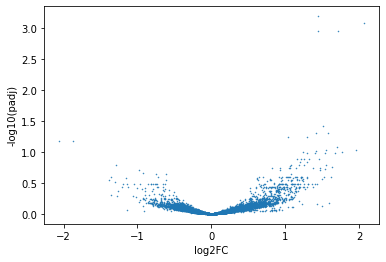

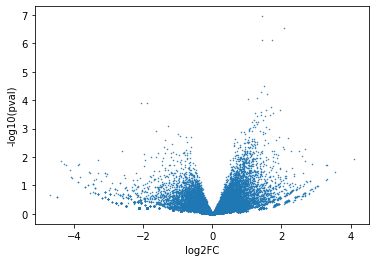

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('workflow/outputs/diff_exp/0m/DESeq_output.tab', sep='\t', header=0)

def plot_fig(df, column, save_path):
    FC = df['log2FoldChange']
    # padj = df.pop('padj')
    padj = df[column]
    log_col = -np.log10(padj)

    plt.scatter(FC, log_col, s=.25)
    plt.xlabel('log2FC')
    # plt.ylim(0, 0.5)
    plt.ylabel(f'-log10({column})')
    plt.savefig(save_path+'/'+column+'.pdf')


plot_fig(df)

In [620]:
df

,Gene stable ID,average_score_Ars_SP3,percentage_modified_Ars_SP3,reads_Ars_SP3
0,ENSG00000000003,0.6606,0.657895,76
1,ENSG00000000419,0.5903,0.606061,66
2,ENSG00000000457,0.8545,0.833333,6
3,ENSG00000000460,0.7275,0.857143,21
4,ENSG00000000971,0.5810,0.673469,49
...,...,...,...,...
14155,ENSG00000290318,0.6910,0.724138,29
14156,ENSG00000291237,0.5586,0.582278,79
14157,ENSG00000291309,0.4421,0.333333,3
14158,ENSG00000291316,0.6577,0.666667,3


# gene to preds

In [4]:
bam_path = 'workflow/outputs/alignment/20210208_hsa_dRNA_HeLa_5EU_1hr_ctrl_0000m_5P_2/reads-align.transcriptome.sorted.bam'


In [28]:
import pysam
import pandas as pd

bamfile = pysam.AlignmentFile(bam_path, 'rb')
data = [
    {'read_id':read.query_name, 'transcript':read.reference_name} 
    for read in bamfile 
    if (not read.is_unmapped and not read.is_supplementary)]
bamfile.close()

read_to_transcript = pd.DataFrame(data)

In [29]:
read_to_transcript

,read_id,transcript
0,6463bac0-836d-4ff2-90c7-0a55a450e7ec,ENST00000361390.2
1,9e9fb823-1765-4644-93c1-ef099ccfda8d,ENST00000361390.2
2,92195767-f7cd-40e9-8457-d74728d78760,ENST00000361390.2
3,e29e437f-f178-4fca-9f86-9ef646275ba3,ENST00000361390.2
4,32ace92d-abef-409e-a173-e1ad1a6bc229,ENST00000361390.2
...,...,...
1241011,d285eae4-4cc5-4a20-a604-6de71d6e9e72,ENST00000514057.1
1241012,bcedbd5b-35d4-4b75-b6a0-83da9d14dee4,ENST00000514057.1
1241013,d4fdce82-fa57-4e07-bb6b-1a1e7084b912,ENST00000416718.2
1241014,df6399ad-cd97-4be0-b6e0-76db421c9046,ENST00000416718.2


In [30]:
transcript_to_gene = pd.read_csv('./workflow/transcript-gene.tab', sep='\t')

In [31]:
# transcript_to_gene 'Transcript stable ID version'
merg = read_to_transcript.merge(transcript_to_gene, left_on='transcript', right_on='Transcript stable ID version', how='left')
merg

,read_id,transcript,Transcript stable ID,Transcript stable ID version,Gene stable ID
0,6463bac0-836d-4ff2-90c7-0a55a450e7ec,ENST00000361390.2,ENST00000361390,ENST00000361390.2,ENSG00000198888
1,9e9fb823-1765-4644-93c1-ef099ccfda8d,ENST00000361390.2,ENST00000361390,ENST00000361390.2,ENSG00000198888
2,92195767-f7cd-40e9-8457-d74728d78760,ENST00000361390.2,ENST00000361390,ENST00000361390.2,ENSG00000198888
3,e29e437f-f178-4fca-9f86-9ef646275ba3,ENST00000361390.2,ENST00000361390,ENST00000361390.2,ENSG00000198888
4,32ace92d-abef-409e-a173-e1ad1a6bc229,ENST00000361390.2,ENST00000361390,ENST00000361390.2,ENSG00000198888
...,...,...,...,...,...
1241011,d285eae4-4cc5-4a20-a604-6de71d6e9e72,ENST00000514057.1,ENST00000514057,ENST00000514057.1,ENSG00000248527
1241012,bcedbd5b-35d4-4b75-b6a0-83da9d14dee4,ENST00000514057.1,ENST00000514057,ENST00000514057.1,ENSG00000248527
1241013,d4fdce82-fa57-4e07-bb6b-1a1e7084b912,ENST00000416718.2,ENST00000416718,ENST00000416718.2,ENSG00000198744
1241014,df6399ad-cd97-4be0-b6e0-76db421c9046,ENST00000416718.2,ENST00000416718,ENST00000416718.2,ENSG00000198744


In [37]:
import pickle
preds_file = 'workflow/outputs/predictions_limited/unlimited_standard_allneg/20210208_hsa_dRNA_HeLa_5EU_1hr_ctrl_0000m_5P_2/mean_pooling.pickle'
with open(preds_file, 'rb') as file:
    preds = pickle.load(file)

read_to_score = pd.DataFrame(preds.items(), columns=['read_id', 'score'])


,read_id,score
0,001040de-c498-4d23-94c0-a99ec37ec2f3,0.870605
1,0012a56e-46b1-4cde-a7af-e3be2fdf33ae,0.827637
2,0034cbc1-7599-4e08-bf67-d42fde66fe1c,0.997070
3,0017fdcc-931d-448d-9cac-60714ab696b3,0.141968
4,00055e6d-cb73-4a6c-a2bb-f435c47064c6,0.984375
...,...,...
19948,fff763b1-47c1-47cd-a038-ef37ecea68cf,0.385742
19949,fff35210-2826-4a49-9c3e-3c2ba748821a,0.715820
19950,ffe31af9-88b8-4e26-b711-7b33a71d0dc0,0.960449
19951,fffbb371-5273-4d4d-98ee-1046a833783d,0.961426


In [69]:
fin = read_to_score.merge(merg, how='left', on='read_id')
fin['predicted_modified'] = (fin['score'] > 0.5).astype(int)
print(len(fin))
print(fin['Gene stable ID'].isnull().sum(), 'reads not paired with a gene - discarded')
fin

19953
2277 reads not paired with a gene - discarded


,read_id,score,transcript,Transcript stable ID,Transcript stable ID version,Gene stable ID,predicted_modified
0,001040de-c498-4d23-94c0-a99ec37ec2f3,0.870605,NaN,NaN,NaN,NaN,1
1,0012a56e-46b1-4cde-a7af-e3be2fdf33ae,0.827637,ENST00000215909.10,ENST00000215909,ENST00000215909.10,ENSG00000100097,1
2,0034cbc1-7599-4e08-bf67-d42fde66fe1c,0.997070,ENST00000273550.12,ENST00000273550,ENST00000273550.12,ENSG00000167996,1
3,0017fdcc-931d-448d-9cac-60714ab696b3,0.141968,ENST00000558506.1,ENST00000558506,ENST00000558506.1,ENSG00000100664,0
4,00055e6d-cb73-4a6c-a2bb-f435c47064c6,0.984375,ENST00000274242.10,ENST00000274242,ENST00000274242.10,ENSG00000145592,1
...,...,...,...,...,...,...,...
19948,fff763b1-47c1-47cd-a038-ef37ecea68cf,0.385742,ENST00000537701.5,ENST00000537701,ENST00000537701.5,ENSG00000111639,0
19949,fff35210-2826-4a49-9c3e-3c2ba748821a,0.715820,ENST00000366815.10,ENST00000366815,ENST00000366815.10,ENSG00000163041,1
19950,ffe31af9-88b8-4e26-b711-7b33a71d0dc0,0.960449,ENST00000362079.2,ENST00000362079,ENST00000362079.2,ENSG00000198938,1
19951,fffbb371-5273-4d4d-98ee-1046a833783d,0.961426,ENST00000479992.5,ENST00000479992,ENST00000479992.5,ENSG00000142541,1


In [73]:
clean_fin = fin[fin['Gene stable ID'].notnull()]
#TODO filter out genes that have less than X reads?
print(clean_fin.groupby('Gene stable ID').size().describe())
clean_fin

count    4458.000000
mean        3.965007
std        12.259191
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       316.000000
dtype: float64


,read_id,score,transcript,Transcript stable ID,Transcript stable ID version,Gene stable ID,predicted_modified
1,0012a56e-46b1-4cde-a7af-e3be2fdf33ae,0.827637,ENST00000215909.10,ENST00000215909,ENST00000215909.10,ENSG00000100097,1
2,0034cbc1-7599-4e08-bf67-d42fde66fe1c,0.997070,ENST00000273550.12,ENST00000273550,ENST00000273550.12,ENSG00000167996,1
3,0017fdcc-931d-448d-9cac-60714ab696b3,0.141968,ENST00000558506.1,ENST00000558506,ENST00000558506.1,ENSG00000100664,0
4,00055e6d-cb73-4a6c-a2bb-f435c47064c6,0.984375,ENST00000274242.10,ENST00000274242,ENST00000274242.10,ENSG00000145592,1
6,0025d045-4915-41a0-9409-9d91593e2cd7,0.541016,ENST00000633925.1,ENST00000633925,ENST00000633925.1,ENSG00000282017,1
...,...,...,...,...,...,...,...
19948,fff763b1-47c1-47cd-a038-ef37ecea68cf,0.385742,ENST00000537701.5,ENST00000537701,ENST00000537701.5,ENSG00000111639,0
19949,fff35210-2826-4a49-9c3e-3c2ba748821a,0.715820,ENST00000366815.10,ENST00000366815,ENST00000366815.10,ENSG00000163041,1
19950,ffe31af9-88b8-4e26-b711-7b33a71d0dc0,0.960449,ENST00000362079.2,ENST00000362079,ENST00000362079.2,ENSG00000198938,1
19951,fffbb371-5273-4d4d-98ee-1046a833783d,0.961426,ENST00000479992.5,ENST00000479992,ENST00000479992.5,ENSG00000142541,1


In [95]:
grouped = clean_fin.groupby('Gene stable ID')
grouped_agg = grouped['score'].mean().reset_index()
grouped_agg['percentage_modified'] = grouped['predicted_modified'].mean().values
grouped_agg['reads'] = grouped.size().values
grouped_agg = grouped_agg.rename(columns={'score':'average_score'})
grouped_agg[grouped_agg['reads']>0]

,Gene stable ID,average_score,percentage_modified,reads
0,ENSG00000000003,0.134399,0.000000,1
1,ENSG00000000419,0.686523,1.000000,1
2,ENSG00000001036,0.643555,0.666667,3
3,ENSG00000001617,0.533691,1.000000,1
4,ENSG00000001630,0.447510,0.500000,2
...,...,...,...,...
4453,ENSG00000288701,0.537109,0.666667,6
4454,ENSG00000288710,0.640137,1.000000,1
4455,ENSG00000288920,0.916504,1.000000,3
4456,ENSG00000290318,0.814941,0.666667,3


In [157]:
grouped_agg['Gene stable ID'].value_counts()
grouped_agg

,Gene stable ID,average_score,percentage_modified,reads
0,ENSG00000000003,0.134399,0.000000,1
1,ENSG00000000419,0.686523,1.000000,1
2,ENSG00000001036,0.643555,0.666667,3
3,ENSG00000001617,0.533691,1.000000,1
4,ENSG00000001630,0.447510,0.500000,2
...,...,...,...,...
4453,ENSG00000288701,0.537109,0.666667,6
4454,ENSG00000288710,0.640137,1.000000,1
4455,ENSG00000288920,0.916504,1.000000,3
4456,ENSG00000290318,0.814941,0.666667,3


In [383]:
grouped_agg = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20201215_hsa_dRNA_HeLa_5EU_2hr_NoArs_0060m_5P_1/max_pooling_gene_level_predictions.tsv', sep='\t')
grouped_agg

,Unnamed: 0,Gene stable ID,average_score,percentage_modified,reads
0,0,ENSG00000000003,0.17090,0.096154,104
1,1,ENSG00000000419,0.12384,0.078947,76
2,2,ENSG00000000457,0.34400,0.333333,3
3,3,ENSG00000000460,0.22830,0.181818,22
4,4,ENSG00000000971,0.06750,0.014085,71
...,...,...,...,...,...
14444,14444,ENSG00000290318,0.20760,0.153846,13
14445,14445,ENSG00000291237,0.29100,0.250000,124
14446,14446,ENSG00000291309,0.41750,0.500000,2
14447,14447,ENSG00000291316,0.41870,0.454545,11


In [384]:
tani_df = pd.read_csv('workflow/tani_halflives.txt', sep='\t')
# tani_df['Transcript.stable.ID'].value_counts()
# tani_df['Gene.stable.ID'].value_counts()
tani_df[tani_df['Gene.stable.ID'] == 'ENSG00000001084']
grouped_tani = tani_df.groupby('Gene.stable.ID')
# for k,v in grouped_tani:
    # print(grouped_tani.get_group(k))
    # break
(grouped_tani['t5'].nunique()==1)
bool_map_of_nonuniques = (grouped_tani['t5'].nunique()!=1)
nonunique_genes = bool_map_of_nonuniques[bool_map_of_nonuniques].index
tani_df[tani_df['Gene.stable.ID'].isin(nonunique_genes)].sort_values('Gene.stable.ID')

#dropping genes with various t5 values - TODO just take first?
unique_tani_df = tani_df[~tani_df['Gene.stable.ID'].isin(nonunique_genes)]
unique_tani_df['Gene.stable.ID'].value_counts()
grouped_unique_tani_df = unique_tani_df.groupby('Gene.stable.ID')
(grouped_unique_tani_df['t5'].nunique()==1).all()

# unique_tani_df[unique_tani_df['Gene.stable.ID']=='ENSG00000198947']
clean_tani = grouped_unique_tani_df.first().reset_index()
clean_tani['Gene.stable.ID'].value_counts()

ENSG00000000419    1
ENSG00000163602    1
ENSG00000163535    1
ENSG00000163539    1
ENSG00000163541    1
                  ..
ENSG00000121766    1
ENSG00000121769    1
ENSG00000121774    1
ENSG00000121775    1
ENSG00000288649    1
Name: Gene.stable.ID, Length: 10055, dtype: int64

In [514]:
from matplotlib import pyplot as plt
import numpy as np
final = grouped_agg.merge(clean_tani, how='left', left_on='Gene stable ID', right_on='Gene.stable.ID')

final = final[final['t5'].notnull()]
final = final[final['reads'] > 20]
final = final[final['t5'] < 4]
# final = final[(final['percentage_modified']!=0)&(final['percentage_modified']!=1)]
tl = 2
col = 'average_score'
# col = 'percentage_modified'
final['pred_t5'] = -tl * np.log(2) / np.log(1-final[col])
# final['pred_t5'] = -tl * np.log(2) / np.log(1-(1/(1+((1-final[col])/final[col]))))

    # return -tl * np.log(2)/(np.log(1-(R/(1+(1-R))))) 
    #percentage_modified
final = final.replace([np.inf, -np.inf], np.nan)
final = final[~final['pred_t5'].isna()]
# final['pred_t5'].isna().any()

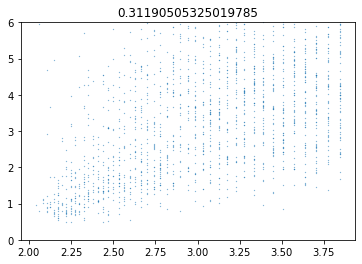

In [516]:
x = final['t5']
y = final['pred_t5']
plt.scatter(x,y, s=0.05)
plt.title(np.corrcoef(x,y)[0,1])
plt.ylim((0,6))
# plt.xlim((0,6))

plt.show()
# plt.scatter(x,y2, s = 0.05)
# plt.title(np.corrcoef(x,y2)[0,1])


# DESEQ

In [3]:
import pandas as pd
deseq = './workflow/outputs/diff_exp/ars_60mins/DESeq_output.tab'

deseq_df = pd.read_csv(deseq, sep='\t', index_col=None).reset_index()
# deseq_df = deseq_df[~deseq_df['pvalue'].isna()]
deseq_df 

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000000003,61.518078,0.029963,0.418471,0.071600,0.942920,0.999958
1,ENSG00000000005,0.135203,-0.648921,4.080473,-0.159031,0.873645,0.999958
2,ENSG00000000419,56.663153,-0.324975,0.493553,-0.658440,0.510256,0.999958
3,ENSG00000000457,3.116014,-2.553015,1.426728,-1.789420,0.073547,0.999958
4,ENSG00000000460,17.250427,-0.943319,0.598690,-1.575639,0.115109,0.999958
...,...,...,...,...,...,...,...
40533,ENSG00000291313,0.000000,NaN,NaN,NaN,NaN,NaN
40534,ENSG00000291314,0.000000,NaN,NaN,NaN,NaN,NaN
40535,ENSG00000291315,0.000000,NaN,NaN,NaN,NaN,NaN
40536,ENSG00000291316,5.100189,0.738004,0.984859,0.749350,0.453647,0.999958


10


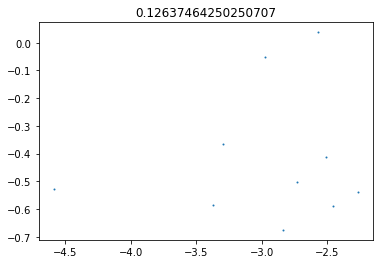

In [616]:
#GOAL FOR DIFF_EXP validation
# Gene - pred_replicate_1_ctrl - p_r_2 - p_r_3 - pred_replicate_1_cond - p_r_2 - p_r_3
# Gene - (avg_pred_ctrl - avg_pred_cond)
# USE METADATA TO DECIDE HOW TO AVERAGE
# TODO AVERAGE SCORE VS AVERAGE_PERCENTAGE_MODIFIED???
n1 = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20201215_hsa_dRNA_HeLa_5EU_2hr_NoArs_0060m_5P_1/max_pooling_gene_level_predictions.tsv', sep='\t', index_col=0)
n2 = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20210202_hsa_dRNA_HeLa_5EU_2hr_NoArs_0060m_5P_2/max_pooling_gene_level_predictions.tsv', sep='\t', index_col=0)
n3 = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20210519_hsa_dRNA_HeLa_5EU_2hr_NoArs_0060m_5P_3/max_pooling_gene_level_predictions.tsv', sep='\t', index_col=0)

a1 = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20201215_hsa_dRNA_HeLa_5EU_2hr_Ars_0060m_5P_1/max_pooling_gene_level_predictions.tsv', sep='\t', index_col=0)
a2 = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20210202_hsa_dRNA_HeLa_5EU_2hr_Ars_0060m_5P_2/max_pooling_gene_level_predictions.tsv', sep='\t', index_col=0)
a3 = pd.read_csv('./workflow/outputs/predictions/CUSTOM_allneg_maxpool/20210519_hsa_dRNA_HeLa_5EU_2hr_Ars_0060m_5P_3/max_pooling_gene_level_predictions.tsv', sep='\t', index_col=0)

noars = [n1,n2,n3]
ars = [a1,a2,a3]
dfs = noars+ars

for i,n_df in enumerate(noars,1):
    n_df.columns = [f'{col}_NoArs_SP{i}' if col != 'Gene stable ID' else col for col in n_df.columns]
    
for i,a_df in enumerate(ars,1):
    a_df.columns = [f'{col}_Ars_SP{i}' if col != 'Gene stable ID' else col for col in a_df.columns]

joined_df = dfs[0]

for df in dfs[1:]:
    joined_df = joined_df.merge(df, on='Gene stable ID', how='outer')
    
joined_df = joined_df.merge(deseq_df, left_on='Gene stable ID', right_on='index', how='right')
# print(joined_df['log2FoldChange'].isna().sum())
joined_df

def calc_fc(df):
    col = 'average_score'
    df['NoArs_avg'] = df[[f'{col}_NoArs_SP{i}' for i in range(1,4)]].mean(axis=1)
    df['Ars_avg'] = df[[f'{col}_Ars_SP{i}' for i in range(1,4)]].mean(axis=1)
    df['Pred_FC'] = np.log2(df['Ars_avg']/df['NoArs_avg'])
    # df['Pred_FC'] = df['NoArs_avg']-df['Ars_avg']
    
    return df

#TODO filter out genes that are missing at least one replicate prediction
joined_df = calc_fc(joined_df)
# joined_df = joined_df[~joined_df['Pred_FC'].isna()]

joined_df = joined_df[~joined_df.isna().any(axis=1)]
# print(joined_df['padj'])
joined_df = joined_df[joined_df['padj'] < 0.55]
print(len(joined_df))
col = 'log2FoldChange'
# col='padj'
x = joined_df[col].values
# x = joined_df['pvalue'].values

y = joined_df['Pred_FC'].values
plt.scatter(x,y, s=1, alpha=1)
plt.title(np.corrcoef(x,y)[0,1])
pass

In [530]:
# diff_df = grouped_agg.merge(deseq_df, how='left', left_on='Gene stable ID', right_on='index')
# diff_df

# Initialize final_df as the first DataFrame in the list
final_df = dfs[0]

# Merge each subsequent DataFrame in the list
for i, df in enumerate(dfs[1:], 2):
    final_df = final_df.merge(df, on='Gene stable ID', how='outer', suffixes=('', f'_{i}'))

print(final_df.describe())


         Unnamed: 0  average_score  percentage_modified         reads  \
count  14449.000000   14449.000000         14449.000000  14449.000000   
mean    7224.000000       0.297091             0.250197    107.703993   
std     4171.211355       0.213773             0.252536    629.176075   
min        0.000000       0.000167             0.000000      1.000000   
25%     3612.000000       0.155600             0.076923      5.000000   
50%     7224.000000       0.243200             0.176471     19.000000   
75%    10836.000000       0.378700             0.333333     58.000000   
max    14448.000000       1.000000             1.000000  31419.000000   

       Unnamed: 0_2  average_score_2  percentage_modified_2       reads_2  \
count  12881.000000     12881.000000           12881.000000  12881.000000   
mean    6440.000000         0.657802               0.689096     69.549802   
std     3718.568743         0.181914               0.250723    401.354420   
min        0.000000         0.0004

## DESEQ REFACTORING

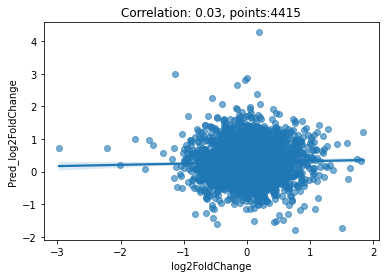

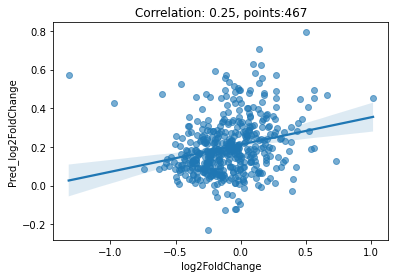

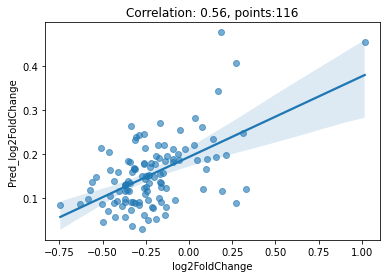

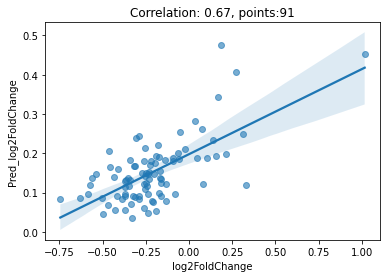

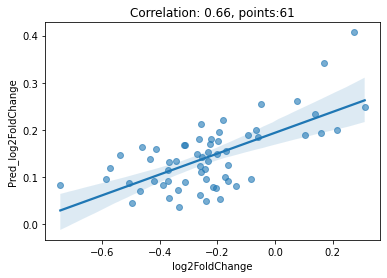

In [175]:
from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
model = 'CUSTOM_allneg_maxpool'
# 'CUSTOM_allneg_maxpool'
# 'unlimited_standard_allneg'
# 'CNN_MAX_extraratio'
ctrl = [
    f'./workflow/outputs/predictions/{model}/20180226_1208_K562_5EU_60_labeled_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20180227_1206_K562_5EU_60_labeled_II_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20180228_1655_K562_5EU_60_labeled_III_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20181206_1038_K562_5EU_60_labeled_IV_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20190719_1232_K562_5EU_60_labeled_V_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20190719_1430_K562_5EU_60_labeled_VI_run/max_pooling_gene_level_predictions.tsv',
]

cond = [
    f'./workflow/outputs/predictions/{model}/20180628_1020_K562_5EU_60_labeled_heat_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20180731_1020_K562_5EU_60_labeled_heat_II_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20180802_1111_K562_5EU_60_labeled_heat_III_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20190725_0809_K562_5EU_60_labeled_heat_IV_run/max_pooling_gene_level_predictions.tsv',
    f'./workflow/outputs/predictions/{model}/20190725_0812_K562_5EU_60_labeled_heat_V_run/max_pooling_gene_level_predictions.tsv',
]
deseq = './workflow/outputs/diff_exp/NANOID_shock/DESeq_output.tab'
target='log2FoldChange'
pred = 'percentage_modified'
# pred = 'average_score'


def calc_fc(df, col, conditions_count, controls_count):
    
    df['ctrl_avg'] = df[[f'{col}_ctrl_{i}' for i in range(controls_count)]].mean(axis=1)
    df['cond_avg'] = df[[f'{col}_cond_{i}' for i in range(conditions_count)]].mean(axis=1)
    df['Pred_FC'] = df['cond_avg']/df['ctrl_avg']
    # df['Pred_FC'] = df['cond_avg']/(df['ctrl_avg']+df['cond_avg'])
    
    #TODO add pred_fc p-value, plot distribution of my FCs and decide on a p-value calculation (distribution)
    #TODO padj in my deseq data looks wrong - all 0.999958 - check script
    return df

def main(min_reads):
    ctrl_paths = ctrl
    cond_paths = cond
    deseq_path = deseq
    pred_col = pred
    target_col = target
    
    deseq_df = pd.read_csv(deseq_path, sep='\t', index_col=None).reset_index()
    deseq_df = deseq_df[~deseq_df['log2FoldChange'].isna()] #Dropping genes that dont contain fold change data
    
    cond_dfs = [pd.read_csv(path, sep='\t', index_col=0) for path in cond_paths]
    ctrl_dfs = [pd.read_csv(path, sep='\t', index_col=0) for path in ctrl_paths]
    
    #OPTIONAL filtering genes that have low amount of reads
    cond_dfs = [df[df['reads']>=min_reads] for df in cond_dfs]
    ctrl_dfs = [df[df['reads']>=min_reads] for df in ctrl_dfs]
    
    for i,cond_df in enumerate(cond_dfs):
        cond_df.columns = [f'{col}_cond_{i}' if col != 'Gene stable ID' else col for col in cond_df.columns]
    
    for i,ctrl_df in enumerate(ctrl_dfs):
        ctrl_df.columns = [f'{col}_ctrl_{i}' if col != 'Gene stable ID' else col for col in ctrl_df.columns]
    
    all_dfs = cond_dfs+ctrl_dfs
    joined_df = all_dfs[0]
    for df in all_dfs[1:]:
        joined_df = joined_df.merge(df, on='Gene stable ID', how='outer')

    joined_df = joined_df.merge(deseq_df, left_on='Gene stable ID', right_on='index', how='right')
    joined_df = calc_fc(joined_df, pred_col, conditions_count = len(cond_dfs), controls_count = len(ctrl_dfs))
    
    # OPTIONAL dropping all genes that dont appear in all experiments
    joined_df = joined_df[~joined_df.isna().any(axis=1)]
    
    
    #Filtering where Pred_FC is infinite or nan (after log division when some of the ratios are infinite)
    joined_df = joined_df.replace([np.inf, -np.inf], np.nan)
    joined_df = joined_df[~joined_df['Pred_FC'].isna()]
    
    # OPTIONAL create log of my ratios
    joined_df['Pred_log2FoldChange'] = np.log2(joined_df['Pred_FC'])
    joined_df = joined_df[~joined_df['Pred_log2FoldChange'].isna()]
    joined_df['FC'] = 2**joined_df['log2FoldChange']
    
    # Plotting variances of predictions and FCs
    # sns.displot(joined_df[[f'{pred_col}_cond_{i}' for i in range(len(cond_dfs))]].var(axis=1))
    # plt.show()
    # sns.displot(joined_df[[f'{pred_col}_ctrl_{i}' for i in range(len(ctrl_dfs))]].var(axis=1))
    # plt.show()
    # sns.displot(joined_df['Pred_FC'])
    # plt.show()
    # sns.displot(joined_df['log2FoldChange'])
    # plt.show()
    # sns.displot(joined_df['FC'])
    # plt.show()
    
    #OPTIONAL dropping genes that have low padj values
    # joined_df = joined_df[joined_df['padj'] < 0.05]
    # joined_df = joined_df[joined_df['padj'] < 1.0]
    # display(joined_df['Pred_FC'].describe())
    
    x = joined_df['log2FoldChange'].values
    y = joined_df['Pred_log2FoldChange'].values
    
    # x = joined_df['FC'].values
    # y = joined_df['Pred_FC'].values
    
    # x = joined_df[target_col].values
    # y = joined_df['Pred_FC'].values
    
    # plt.scatter(x,y, s=1, alpha=1.0)
    sns.regplot(data=joined_df, x='log2FoldChange',y='Pred_log2FoldChange', scatter_kws={'alpha':0.6})
    
    # sns.regplot(x,y, scatter_kws={'alpha':0.6})
    plt.title(f'Correlation: {np.corrcoef(x,y)[0,1]:.2f}, points:{len(joined_df)}')
    
    plt.show() #TODO delete for script 
    # plt.savefig(args.output) #TODO uncomment for script
    
main(min_reads=0)
main(min_reads=10)
main(min_reads=50)
main(min_reads=75)
main(min_reads=100)



# Violins

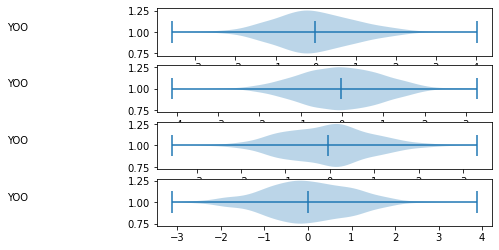

In [419]:
from matplotlib import pyplot as plt

dists = 4
nums = np.random.normal(size=(dists,1000))
fig,ax = plt.subplots(dists, 1, squeeze=False)
for i,arr in enumerate(nums):
    ax[i][0].violinplot(arr, showmeans=True, vert=False)
    ax[i][0].set_ylabel('YOO', rotation=0, labelpad=110)
    
    

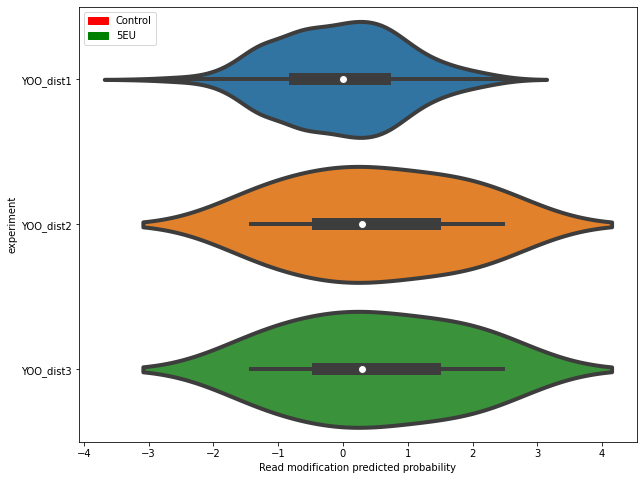

In [443]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
dist1 = np.random.normal(size=1000)
dist2 = np.random.normal(size=10)

# Create a DataFrame from the numpy array and add an extra column for 'YOO'
df = pd.DataFrame({
    'YOO_dist1': pd.Series(dist1),
    'YOO_dist2': pd.Series(dist2),
    'YOO_dist3': pd.Series(dist2),
    
})
# Melt the DataFrame to long format
# print(df)
df_melt = df.melt(var_name='experiment', value_name='Read modification predicted probability')

# Drop the NaN values
df_melt = df_melt.dropna()
# print(df_melt)
# Create the violin plot using seaborn
plt.figure(figsize=(10, 8))
sns.violinplot(x='Read modification predicted probability', y='experiment', data=df_melt, orient='h', inner='box',scale='width', linewidth=4)
# Create legend patches
red_patch = mpatches.Patch(color='red', label='Control')
green_patch = mpatches.Patch(color='green', label='5EU')

# Place the legend to upper right
plt.legend(handles=[red_patch, green_patch], loc='upper left')
plt.show()


# Quality control 

In [619]:
from Bio import SeqIO
import gzip

filename ="./workflow/local_store/arsenite/raw/20201220_hsa_dRNA_HeLa_5EU_2hr_Ars_0120m_5P_1/guppy/reads.fastq.gz"

with gzip.open(filename, "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        print(f"Record ID: {record.id}")
        print(record)
        print(f"Quality scores: {record.letter_annotations['phred_quality']}")
        break

Record ID: 26deedcd-492f-416e-9e9a-13bdc4dbc7a9
ID: 26deedcd-492f-416e-9e9a-13bdc4dbc7a9
Name: 26deedcd-492f-416e-9e9a-13bdc4dbc7a9
Description: 26deedcd-492f-416e-9e9a-13bdc4dbc7a9 runid=8770f0e464535148ef69439d69299ef457b2e61d sampleid=20201220_hsa_dRNASeq_HeLa_5EU_2hr_Ars_R1_polyA_1 read=19776 ch=150 start_time=2020-12-22T04:20:05Z
Number of features: 0
Per letter annotation for: phred_quality
Seq('AGGCGGCAGGAAGATGGCGGACATTCAGACTGAGCGTGCCTACCAAAAGCAGCC...CCC')
Quality scores: [11, 17, 17, 25, 18, 16, 20, 7, 24, 32, 24, 37, 31, 34, 31, 28, 25, 26, 28, 26, 35, 30, 11, 7, 6, 17, 13, 14, 10, 18, 26, 21, 27, 30, 31, 28, 24, 24, 24, 12, 11, 3, 6, 13, 4, 14, 19, 20, 20, 36, 28, 33, 29, 26, 28, 31, 23, 26, 29, 21, 20, 15, 32, 34, 26, 32, 29, 29, 31, 33, 26, 17, 35, 20, 28, 36, 27, 26, 12, 16, 32, 29, 30, 21, 8, 19, 15, 18, 21, 19, 13, 11, 6, 26, 27, 37, 38, 27, 28, 9, 32, 14, 16, 16, 7, 12, 25, 25, 5, 6, 15, 4, 4, 5, 3, 9, 14, 14, 16, 28, 23, 12, 8, 9, 14, 9, 23, 29, 27, 28, 23, 20, 11, 11,

# Architectures

In [30]:
import torch
from torchsummary import summary
from rnamodif.models.modules import SimpleCNN, Permute, RNNEncoder, MLP, Attention
from rnamodif.models.generic import GenericUnlimited

class CNN_ATT(GenericUnlimited):
    def __init__(self, 
                 cnn_depth, 
                 initial_channels=8, 
                 mlp_hidden_size=30,
                 dilation=1,
                 padding=0,
                 len_limit=400000,
                 **kwargs): 
        super().__init__(**kwargs)
        self.architecture = torch.nn.Sequential(
            SimpleCNN(num_layers=cnn_depth, dilation=dilation, padding=padding),
            Permute(),
            Attention(input_dim=initial_channels*(2**(cnn_depth-1)), len_limit=len_limit),
            MLP(initial_channels*(2**(cnn_depth-1)), hidden_size=mlp_hidden_size),
        ) 
    
model = CNN_ATT(cnn_depth=3,lr=1.0,warmup_steps=10,wd=0.01,logging_steps=1,pos_weight=0.1)
model(torch.randn(8,1,510000)).size()



        # if(pooling=='att'):
        #     self.architecture = torch.nn.Sequential(
        #         ConvNet(),
        #         Permute(),
        #         Attention(input_dim=128, len_limit=400000),
        #         MLP(128, 30),
        #     )

torch.Size([8, 1])

In [179]:
comparisons = {
    'test_nanoid':{
        'positives':[
            '20180514_1054_K562_5EU_1440_labeled_run_TEST',
            '20180514_1541_K562_5EU_1440_labeled_II_run_TEST',
            '20180516_1108_K562_5EU_1440_labeled_III_run_TEST',
        ],
        'negatives':[
            # '20180327_1102_K562_5EU_0_unlabeled_run_TEST',
            '20180403_1102_K562_5EU_0_unlabeled_II_run_TEST',
            '20180403_1208_K562_5EU_0_unlabeled_III_run_TEST',
        ],
    },
}
# neg_group_names = [group for _ in subdict['negatives'] for group, subdict in comparisons.items()],
[group for group, subdict in comparisons.items() for _ in subdict['negatives']]

['test_nanoid', 'test_nanoid']

In [12]:
import numpy as np
th = 0.5
np.where(np.array([0.6,0.4,0.9]) > th, 1, 0)

array([1, 0, 1])

# Gene to transcript

In [87]:
# from Bio import SeqIO

# with open('workflow/Mus_musculus.GRCm39.cdna.all.fa', 'r') as fasta_file:
#     for record in SeqIO.parse(fasta_file, 'fasta'):  
#         print(record,'\n')
#         break
        

with open('workflow/Homo_sapiens.GRCh38.cdna.all.fa', 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):  
        print(record.description,'\n')
        print(dir(record))
        break
        

from Bio import SeqIO
import pandas as pd

ids = []
names = []

with open('workflow/Mus_musculus.GRCm39.cdna.all.fa', 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        ids.append(record.id)
        names.append(record.name)

df = pd.DataFrame({
    'ID': ids,
    'Name': names
})

print(df)


       

ENST00000631435.1 cdna chromosome:GRCh38:CHR_HSCHR7_2_CTG6:142847306:142847317:1 gene:ENSG00000282253.1 gene_biotype:TR_D_gene transcript_biotype:TR_D_gene gene_symbol:TRBD1 description:T cell receptor beta diversity 1 [Source:HGNC Symbol;Acc:HGNC:12158] 

['__add__', '__bool__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_per_letter_annotations', '_seq', '_set_per_letter_annotations', '_set_seq', 'annotations', 'count', 'dbxrefs', 'description', 'features', 'format', 'id', 'islower', 'isupper', 'letter_annotations', 'lower', 'name', 'reverse_complement', 'seq', 'translate', 'upper']
                          ID             

In [32]:
import pysam
import pandas as pd

tr_bam = 'workflow/outputs/alignment/20230706_mmu_dRNA_3T3_5EU_400_1/reads-align.transcriptome.sorted.bam'
bamfile = pysam.AlignmentFile(tr_bam, 'rb')

read_to_transcript_data = [
    {'read_id':read.query_name, 'transcript':read.reference_name} 
    for read in bamfile 
    if (not read.is_unmapped and not read.is_supplementary)
]
bamfile.close()
read_to_transcript = pd.DataFrame(read_to_transcript_data)
read_to_transcript

aa3e18c7-29b3-4257-9957-c71a3274232f 146 ENSMUST00000103655.3


In [ ]:
!pip install gtfparse

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 44.2 MB/s eta 0:00:0000:0100:01
  Created wheel for gtfparse: filename=gtfparse-2.0.1-py3-none-any.whl size=15289 sha256=8892f0388e9dba7be020c6841fbce0d27e2c44c174e571d99a8ba3cf0f10e6cf
  Stored in directory: /home/jovyan/.cache/pip/wheels/1f/41/c0/e53c80f0a28b170f97089fa56581239b10bf3e19bc648a7d73
Successfully built gtfparse


In [51]:
import pandas as pd

def load_gtf(gtf_file_path):
    # Define the column names for the GTF format
    col_names = [
        'seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'
    ]

    # Read the GTF file into a Pandas DataFrame
    df = pd.read_csv(gtf_file_path, sep='\t', comment='#', header=None, names=col_names)

    return df

# Example usage
gtf_file_path = 'workflow/Mus_musculus.GRCm39.110.gtf'
df = load_gtf(gtf_file_path)

# Print the first few rows to verify
print(df.head())


/tmp/ipykernel_77/3559393210.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(gtf_file_path, sep='\t', comment='#', header=None, names=col_names)


  seqname  source     feature      start        end score strand frame  \
0       1  havana        gene  108344807  108347562     .      +     .   
1       1  havana  transcript  108344807  108347562     .      +     .   
2       1  havana        exon  108344807  108347562     .      +     .   
3       1  havana        gene    6980784    6981446     .      +     .   
4       1  havana  transcript    6980784    6981446     .      +     .   

                                           attribute  
0  gene_id "ENSMUSG00000104478"; gene_version "2"...  
1  gene_id "ENSMUSG00000104478"; gene_version "2"...  
2  gene_id "ENSMUSG00000104478"; gene_version "2"...  
3  gene_id "ENSMUSG00000104385"; gene_version "2"...  
4  gene_id "ENSMUSG00000104385"; gene_version "2"...  


In [54]:
df = df[df['feature'] == 'transcript']

In [77]:
df['attribute'].iloc[0].split(';')

['gene_id "ENSMUSG00000104478"',
 ' gene_version "2"',
 ' transcript_id "ENSMUST00000194081"',
 ' transcript_version "2"',
 ' gene_name "Gm38212"',
 ' gene_source "havana"',
 ' gene_biotype "TEC"',
 ' transcript_name "Gm38212-201"',
 ' transcript_source "havana"',
 ' transcript_biotype "TEC"',
 ' tag "basic"',
 ' tag "Ensembl_canonical"',
 ' transcript_support_level "NA (assigned to previous version 1)"',
 '']

In [79]:
def parse_attributes(attribute_str):
    gene_id = attribute_str.split(';')[0].split(' ')[1].strip('"')
    transcript_id = attribute_str.split(';')[2].split(' ')[2].strip('"')
    return {'gene_id':gene_id, 'transcript_id':transcript_id}

attributes_df = df['attribute'].apply(parse_attributes).apply(pd.Series)
attributes_df

,gene_id,transcript_id
1,ENSMUSG00000104478,ENSMUST00000194081
4,ENSMUSG00000104385,ENSMUST00000194393
7,ENSMUSG00000101231,ENSMUST00000185509
10,ENSMUSG00000102135,ENSMUST00000194605
14,ENSMUSG00000103282,ENSMUST00000191703
...,...,...
1901131,ENSMUSG00002074970,ENSMUST00020182238
1901134,ENSMUSG00002075729,ENSMUST00020182428
1901137,ENSMUSG00002074899,ENSMUST00020181793
1901140,ENSMUSG00002076890,ENSMUST00020183073


In [80]:
result_df = pd.concat([df.drop('attribute', axis=1), attributes_df], axis=1)
result_df

,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id
1,1,havana,transcript,108344807,108347562,.,+,.,ENSMUSG00000104478,ENSMUST00000194081
4,1,havana,transcript,6980784,6981446,.,+,.,ENSMUSG00000104385,ENSMUST00000194393
7,1,havana,transcript,108540067,108540244,.,-,.,ENSMUSG00000101231,ENSMUST00000185509
10,1,havana,transcript,6986783,6993812,.,+,.,ENSMUSG00000102135,ENSMUST00000194605
14,1,havana,transcript,6999983,7000012,.,+,.,ENSMUSG00000103282,ENSMUST00000191703
...,...,...,...,...,...,...,...,...,...,...
1901131,GL456385.1,ensembl,transcript,31243,31343,.,+,.,ENSMUSG00002074970,ENSMUST00020182238
1901134,GL456385.1,ensembl,transcript,32719,32818,.,+,.,ENSMUSG00002075729,ENSMUST00020182428
1901137,GL456372.1,ensembl,transcript,13262,13382,.,-,.,ENSMUSG00002074899,ENSMUST00020181793
1901140,GL456381.1,ensembl,transcript,16623,16721,.,-,.,ENSMUSG00002076890,ENSMUST00020183073


In [106]:
attributes_df
df['transcript'] = df['ID'].apply(lambda x: x.split('.')[0])
fin_df = pd.merge(df, attributes_df, left_on='transcript', right_on='transcript_id', how='inner')
fin_df

,ID,Name,transcript,gene_id,transcript_id
0,ENSMUST00000196221.2,ENSMUST00000196221.2,ENSMUST00000196221,ENSMUSG00000096749,ENSMUST00000196221
1,ENSMUST00000179664.2,ENSMUST00000179664.2,ENSMUST00000179664,ENSMUSG00000096749,ENSMUST00000179664
2,ENSMUST00000177564.2,ENSMUST00000177564.2,ENSMUST00000177564,ENSMUSG00000096176,ENSMUST00000177564
3,ENSMUST00000178537.2,ENSMUST00000178537.2,ENSMUST00000178537,ENSMUSG00000095668,ENSMUST00000178537
4,ENSMUST00000178862.2,ENSMUST00000178862.2,ENSMUST00000178862,ENSMUSG00000094569,ENSMUST00000178862
...,...,...,...,...,...
116868,ENSMUST00000123131.2,ENSMUST00000123131.2,ENSMUST00000123131,ENSMUSG00000084858,ENSMUST00000123131
116869,ENSMUST00000135189.2,ENSMUST00000135189.2,ENSMUST00000135189,ENSMUSG00000086489,ENSMUST00000135189
116870,ENSMUST00000238931.2,ENSMUST00000238931.2,ENSMUST00000238931,ENSMUSG00000118566,ENSMUST00000238931
116871,ENSMUST00000119708.2,ENSMUST00000119708.2,ENSMUST00000119708,ENSMUSG00000084198,ENSMUST00000119708


In [107]:
fin_df_2 = fin_df.drop(['ID', 'transcript'], axis=1)
fin_df_2


,Name,gene_id,transcript_id
0,ENSMUST00000196221.2,ENSMUSG00000096749,ENSMUST00000196221
1,ENSMUST00000179664.2,ENSMUSG00000096749,ENSMUST00000179664
2,ENSMUST00000177564.2,ENSMUSG00000096176,ENSMUST00000177564
3,ENSMUST00000178537.2,ENSMUSG00000095668,ENSMUST00000178537
4,ENSMUST00000178862.2,ENSMUSG00000094569,ENSMUST00000178862
...,...,...,...
116868,ENSMUST00000123131.2,ENSMUSG00000084858,ENSMUST00000123131
116869,ENSMUST00000135189.2,ENSMUSG00000086489,ENSMUST00000135189
116870,ENSMUST00000238931.2,ENSMUSG00000118566,ENSMUST00000238931
116871,ENSMUST00000119708.2,ENSMUSG00000084198,ENSMUST00000119708


In [108]:
fin_df_2 = fin_df_2.rename(columns={'transcript_id':'Transcript stable ID', 'gene_id': 'Gene stable ID', 'Name': 'Transcript stable ID version'})
fin_df_2

,Transcript stable ID version,Gene stable ID,Transcript stable ID
0,ENSMUST00000196221.2,ENSMUSG00000096749,ENSMUST00000196221
1,ENSMUST00000179664.2,ENSMUSG00000096749,ENSMUST00000179664
2,ENSMUST00000177564.2,ENSMUSG00000096176,ENSMUST00000177564
3,ENSMUST00000178537.2,ENSMUSG00000095668,ENSMUST00000178537
4,ENSMUST00000178862.2,ENSMUSG00000094569,ENSMUST00000178862
...,...,...,...
116868,ENSMUST00000123131.2,ENSMUSG00000084858,ENSMUST00000123131
116869,ENSMUST00000135189.2,ENSMUSG00000086489,ENSMUST00000135189
116870,ENSMUST00000238931.2,ENSMUSG00000118566,ENSMUST00000238931
116871,ENSMUST00000119708.2,ENSMUSG00000084198,ENSMUST00000119708


In [109]:
fin_df_2.to_csv('workflow/transcript-gene-mouse.tab', sep='\t', index=False)
#TODO make this automated in snakemake, am i doing it right?

# Halflives files

In [133]:
hmion = 'workflow/3T3_mion_halflives.csv'
hpion = 'workflow/3T3_PION_halflives.csv'

df_hpion = pd.read_csv(hpion)
df_hpion = df_hpion[['transcript','gene','t5']]
df_hpion = df_hpion.rename(columns={'transcript':'Transcript.stable.ID','gene':'Gene.stable.ID'})
df_hpion.to_csv('workflow/hpion_halflives.txt', sep='\t', index=False)

df_hmion = pd.read_csv(hmion)
df_hmion = df_hmion[['transcript','gene','t5']]
df_hmion = df_hmion.rename(columns={'transcript':'Transcript.stable.ID','gene':'Gene.stable.ID'})
df_hmion.to_csv('workflow/hmion_halflives.txt', sep='\t', index=False)


In [134]:
from matplotlib import pyplot as plt
merged = pd.merge(df_hmion, df_hpion, left_on='Transcript.stable.ID', right_on='Transcript.stable.ID', how='inner')
# plt.plot(merged['t5_x'].values,merged['t5_y'].values)
merged

,Transcript.stable.ID,Gene.stable.ID_x,t5_x,Gene.stable.ID_y,t5_y
0,ENSMUST00000000001,ENSMUSG00000000001,1.9597281751018201,ENSMUSG00000000001,1.9597281751018201
1,ENSMUST00000000087,ENSMUSG00000000085,0.48968783698861201,ENSMUSG00000000085,0.48968783698861201
2,ENSMUST00000000090,ENSMUSG00000000088,20.606646431274498,ENSMUSG00000000088,20.606646431274498
3,ENSMUST00000000175,ENSMUSG00000000171,8.2229971042532402,ENSMUSG00000000171,8.2229971042532402
4,ENSMUST00000000188,ENSMUSG00000000184,2.4956529476971498,ENSMUSG00000000184,2.4956529476971498
...,...,...,...,...,...
2851,ENSMUST00000239322,ENSMUSG00000024955,2.34001383478545,ENSMUSG00000024955,2.34001383478545
2852,ENSMUST00000239401,ENSMUSG00000020308,3.4904153265189999,ENSMUSG00000020308,3.4904153265189999
2853,ENSMUST00000239402,ENSMUSG00000020571,19.588575906254199,ENSMUSG00000020571,19.588575906254199
2854,ENSMUST00000239468,ENSMUSG00000037415,0.97885582743352195,ENSMUSG00000037415,0.97885582743352195


In [136]:
df_hpion = pd.read_csv(hpion)
df_hpion

,transcript,name,gene,n_readlength,maxmean_readlength,sigma_readlength,prop_readlength,min_readlength,n_polyA,maxmean_polyA,sigma_polyA,prop_polyA,min_polyA,t5
0,ENSMUST00000000001,Gnai3,ENSMUSG00000000001,722.0,1733.739185,892.160098,0.554112,166.0,460.0,149.138495,63.890467,0.505323,5.72,1.9597281751018201
1,ENSMUST00000000033,Igf2,ENSMUSG00000048583,24.0,1132.517432,158.903203,0.529670,273.0,16.0,119.983218,48.849048,0.490016,2.78,--
2,ENSMUST00000000058,Cav2,ENSMUSG00000000058,371.0,1380.236332,746.934603,0.567717,173.0,237.0,146.119223,62.844869,0.521235,9.42,1.8699291222147301
3,ENSMUST00000000080,Klf6,ENSMUSG00000000078,307.0,1423.841926,804.488557,0.563220,200.0,185.0,158.748237,81.092654,0.523190,2.55,0.1
4,ENSMUST00000000087,Scmh1,ENSMUSG00000000085,256.0,1543.633383,693.049001,0.490144,161.0,183.0,161.759526,66.848057,0.528162,8.52,0.48968783698861201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058,ENSMUST00000239401,Tpgs1,ENSMUSG00000020308,65.0,1159.343475,44.709990,0.641343,272.0,42.0,119.156993,58.377369,0.511322,4.12,3.4904153265189999
4059,ENSMUST00000239402,Pdia6,ENSMUSG00000020571,861.0,1361.610261,428.089962,0.525250,145.0,616.0,152.375130,62.831426,0.507863,9.42,19.588575906254199
4060,ENSMUST00000239468,Ranbp10,ENSMUSG00000037415,63.0,1937.456088,945.928819,0.552027,203.0,46.0,179.669769,74.280703,0.531434,8.04,0.97885582743352195
4061,ENSMUST00000239473,Tpst2,ENSMUSG00000029344,143.0,1838.791438,35.855728,0.800802,139.0,103.0,130.804516,58.449626,0.518746,5.81,1.5579595273236599


In [148]:
df_hmion = pd.read_csv(hmion)
merged = pd.merge(df_hmion, df_hpion, left_on='transcript', right_on='transcript', how='inner')
print(len(df_hmion), len(df_hpion), len(merged))
merged[['t5_x','t5_y']]
all((merged['t5_x'] == merged['t5_y']).values)

3330 4063 2856


True

In [165]:
merged = pd.concat([df_hmion, df_hpion], ignore_index=True)
merged = merged.drop_duplicates(subset='transcript')
merged = merged.reset_index()
merged = merged.rename(columns={'transcript':'Transcript.stable.ID','gene':'Gene.stable.ID'})
merged = merged[merged['t5']!='--']
merged.to_csv('workflow/mouse_halflives.txt', sep='\t', index=False)

for x in merged['t5'].values:
    float(x)

In [188]:
import pandas as pd
df = pd.read_csv('workflow/mouse_halflives.txt', sep='\t')

grouped_df = df.groupby('Gene.stable.ID')
#TODO why am i taking t5 here?
bool_map_of_nonuniques = (grouped_df['t5'].nunique()!=1)
nonunique_genes = bool_map_of_nonuniques[bool_map_of_nonuniques].index

#dropping genes with various t5 values - TODO just take first?
unique_df = df[~df['Gene.stable.ID'].isin(nonunique_genes)]
grouped_unique_df = unique_df.groupby('Gene.stable.ID')
assert (grouped_unique_df['t5'].nunique()==1).all()
clean_df = grouped_unique_df.first().reset_index()
len(clean_df)

# for g in df['Gene.stable.ID'].unique():
#     new_df = df[df['Gene.stable.ID']==g]
#     if(len(new_df)>1):
#         print(new_df[['Gene.stable.ID','t5']])
#         print('____')

clean_df['Gene.stable.ID'].nunique()


2822

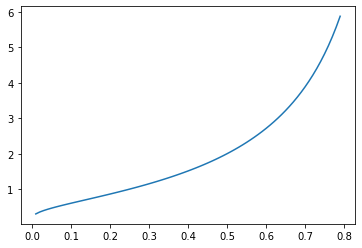

In [199]:
import numpy as np
from matplotlib import pyplot as plt
p = np.arange(0.01,0.8,0.01)
# print(p)
h = -2*np.log(2)/np.log(p)
plt.plot(p,h)

In [46]:
hmion = 'workflow/3T3_mion_halflives.csv'
hpion = 'workflow/3T3_PION_halflives.csv'

p = pd.read_csv(hpion)
m = pd.read_csv(hmion)
print(p)
p[['gene','t5']]
m[['gene','t5']]

mer = p.merge(m, on='gene')
t5s = mer[['t5_x','t5_y']]
# print(len(t5s))
t5s = t5s[pd.to_numeric(t5s['t5_x'], errors='coerce').notnull()]
t5s = t5s[pd.to_numeric(t5s['t5_y'], errors='coerce').notnull()]

# t5s = t5s[(t5s['t5_x']!='--')&t5s['t5_y']!='--']
print(len(t5s))


# plt.plot(t5s['t5_x'], t5s['t5_y'])

              transcript     name                gene  n_readlength  \
0     ENSMUST00000000001    Gnai3  ENSMUSG00000000001         722.0   
1     ENSMUST00000000033     Igf2  ENSMUSG00000048583          24.0   
2     ENSMUST00000000058     Cav2  ENSMUSG00000000058         371.0   
3     ENSMUST00000000080     Klf6  ENSMUSG00000000078         307.0   
4     ENSMUST00000000087    Scmh1  ENSMUSG00000000085         256.0   
...                  ...      ...                 ...           ...   
4058  ENSMUST00000239401    Tpgs1  ENSMUSG00000020308          65.0   
4059  ENSMUST00000239402    Pdia6  ENSMUSG00000020571         861.0   
4060  ENSMUST00000239468  Ranbp10  ENSMUSG00000037415          63.0   
4061  ENSMUST00000239473    Tpst2  ENSMUSG00000029344         143.0   
4062  ENSMUST00000239497    Psmc2  ENSMUSG00000028932          43.0   

      maxmean_readlength  sigma_readlength  prop_readlength  min_readlength  \
0            1733.739185        892.160098         0.554112         

In [236]:
for x in t5s['t5_x']:
    float(x)

In [240]:
t5s = t5s.astype(float)
t5s


,t5_x,t5_y
0,1.959728,1.959728
1,0.489688,0.489688
2,0.489688,0.489688
3,20.606646,20.606646
4,8.222997,8.222997
...,...,...
5906,5.423156,5.423156
5907,5.423156,5.423156
5908,2.340014,2.340014
5909,19.588576,19.588576


In [242]:
t5s['t5_x'].corr(t5s['t5_y'])

1.0

# Using features_v1 from hackathon for decay data 

In [44]:
import pandas as pd
exps = ['hsa_dRNA_HeLa_DRB_0h_1','mmu_dRNA_3T3_mion_1', 'mmu_dRNA_3T3_PION_1']
for exp in exps:
    df_path = f'../../Hackathon202305/prep/experiments/{exp}/features_v1.csv'
    df = pd.read_csv(df_path)
    df = df.rename(columns={'gene':'Gene.stable.ID'})
    # df = df.groupby('Gene.stable.ID').first() #Multiple transcripts per gene, all have the same halflife measured, dropping duplicates
    #check if not aggregated per gene 
    # print(df.groupby('Gene.stable.ID').size().describe())
    # print(len(df))
    print(df.head())
    fi = df.groupby('Gene.stable.ID').size().sort_values()[:-10]
    # for gene in fi[-30:].index:
        # print(df[df['Gene.stable.ID']==gene][['Gene.stable.ID','transcript', 't5']])
    # print(df['Gene.stable.ID'].isin(df.groupby('Gene.stable.ID').size().sort_values()[:-10]))


        transcript     name   Gene.stable.ID  n_readlength  \
0  ENST00000000412     M6PR  ENSG00000003056         117.0   
1  ENST00000000442    ESRRA  ENSG00000173153          49.0   
2  ENST00000001008    FKBP4  ENSG00000004478         813.0   
3  ENST00000002829   SEMA3F  ENSG00000001617          80.0   
4  ENST00000003100  CYP51A1  ENSG00000001630         138.0   

   maxmean_readlength  sigma_readlength  prop_readlength  min_readlength  \
0         2435.842267         66.610492         0.533835           415.0   
1         2276.117168         49.704011         0.373865           361.0   
2         2213.001642         48.999549         0.731268           179.0   
3         2780.985876       1033.197235         0.548371           318.0   
4         1757.716271        949.978227         0.560146           209.0   

   n_polyA  maxmean_polyA  sigma_polyA  prop_polyA  min_polyA         t5  
0     98.0     103.161701    51.229911    0.523162       5.80   8.903226  
1     38.0     128.4

In [260]:
df['Gene.stable.ID'].value_counts()
df[df['Gene.stable.ID']=='ENSMUSG00000022565']

,transcript,name,Gene.stable.ID,n_readlength,maxmean_readlength,sigma_readlength,prop_readlength,min_readlength,n_polyA,maxmean_polyA,sigma_polyA,prop_polyA,min_polyA,t5
502,ENSMUST00000023226,Plec,ENSMUSG00000022565,68.0,1458.724025,819.327785,0.588785,236.0,49.0,135.081189,51.635106,0.515393,12.18,0.845138144583094
1568,ENSMUST00000054449,Plec,ENSMUSG00000022565,181.0,1492.902380,810.927606,0.550240,139.0,118.0,167.134713,62.955027,0.490989,3.94,0.845138144583094
1909,ENSMUST00000071869,Plec,ENSMUSG00000022565,173.0,1489.593155,853.691269,0.561674,134.0,124.0,153.596204,69.630140,0.515425,4.52,0.845138144583094
1925,ENSMUST00000072692,Plec,ENSMUSG00000022565,54.0,1415.731586,825.779426,0.579459,180.0,40.0,162.835282,69.146159,0.519210,3.59,0.845138144583094
1945,ENSMUST00000073418,Plec,ENSMUSG00000022565,163.0,1551.216464,904.771772,0.561902,182.0,108.0,145.278271,52.801966,0.490631,5.90,0.845138144583094
1960,ENSMUST00000074834,Plec,ENSMUSG00000022565,65.0,1370.287939,753.783872,0.576776,228.0,46.0,145.412829,59.389032,0.481848,4.27,0.845138144583094
1988,ENSMUST00000076442,Plec,ENSMUSG00000022565,55.0,1280.320434,688.008935,0.562399,267.0,38.0,162.020785,66.763357,0.540936,17.65,0.845138144583094
2058,ENSMUST00000080857,Plec,ENSMUSG00000022565,148.0,1372.109020,858.921812,0.587370,178.0,102.0,158.553014,54.430159,0.497374,12.55,0.845138144583094
2153,ENSMUST00000089610,Plec,ENSMUSG00000022565,168.0,1452.491812,779.922616,0.548928,113.0,119.0,150.965744,64.948853,0.529119,16.45,0.845138144583094
3444,ENSMUST00000169108,Plec,ENSMUSG00000022565,59.0,1376.654199,1085.783537,0.648780,257.0,38.0,118.555623,41.504465,0.504576,8.13,0.845138144583094


# Signal viz

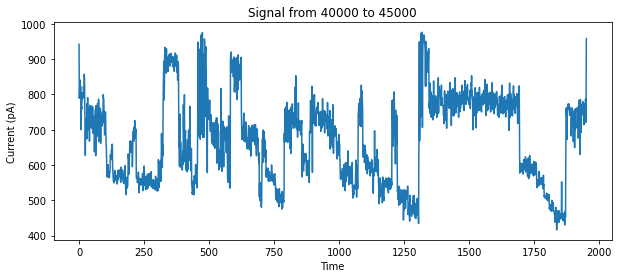

In [17]:
file_path = 'workflow/local_store/store/seq/ont/experiments/m6A_0/fast5/batch10.fast5'
from ont_fast5_api.fast5_interface import get_fast5_file
import matplotlib.pyplot as plt

def plot_fast5_signal(file_path, start, stop):
    with get_fast5_file(file_path, mode='r') as f5:
        for read in f5.get_reads():
            # Get raw signal data
            raw_signal = read.get_raw_data()
            
            # Extract and plot the portion of the signal between 'start' and 'stop'
            signal_to_plot = raw_signal[start:stop]
            
            plt.figure(figsize=(10, 4))
            plt.plot(signal_to_plot)
            plt.title(f'Signal from {start} to {stop}')
            plt.xlabel('Time')
            plt.ylabel('Current (pA)')
            # plt.show()
            plt.savefig('./temp_viz_signal.pdf', bbox_inches = 'tight')
            
            break

# Example usage
start = 40000  # Replace with your desired start position
stop = start+5000  # Replace with your desired stop position

plot_fast5_signal(file_path, start, stop)



In [51]:
import numpy as np
2 * np.log(2) / np.log(1-0.41)

-2.627385017178233